Практическая работа 5 - Атаманчук А.В. КВБО-01-22

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    roc_curve,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


1. Загрузка данных и первичный анализ


In [2]:
df = pd.read_csv('../../seminars/S05/S05-hw-dataset.csv')
print(f"Размер датасета: {df.shape}")
print(f"\nПервые строки:")
df.head()


Размер датасета: (3000, 17)

Первые строки:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [4]:
df.describe()


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


Распределение целевого признака 'default':
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Абсолютные значения:
default
0    1769
1    1231
Name: count, dtype: int64


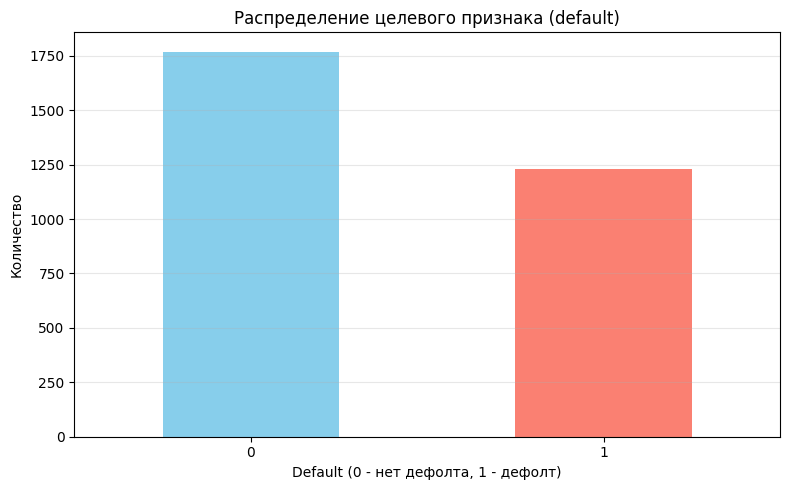

In [5]:
target_dist = df['default'].value_counts(normalize=True)
print("Распределение целевого признака 'default':")
print(target_dist)
print(f"\nАбсолютные значения:")
print(df['default'].value_counts())

plt.figure(figsize=(8, 5))
df['default'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение целевого признака (default)')
plt.xlabel('Default (0 - нет дефолта, 1 - дефолт)')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Наблюдения по первичному анализу:

- Размер датасета: Датасет содержит 3000 записей и 17 признаков (включая default и client_id).
- Типы данных: Все признаки числовые (целые числа или вещественные).
- Распределение классов: около 40% записей имеют дефолт (1), 60% - нет дефолта (0).
- Аномалии: Предварительный анализ не выявил явных аномалий в данных. Все значения находятся в разумных диапазонах согласно описанию признаков.

2. Подготовка признаков и таргета


In [6]:
X = df.drop(columns=['client_id', 'default'])
y = df['default']

print(f"Размерность матрицы признаков X: {X.shape}")
print(f"Размерность вектора таргета y: {y.shape}")
print(f"\nСписок признаков:")
print(list(X.columns))


Размерность матрицы признаков X: (3000, 15)
Размерность вектора таргета y: (3000,)

Список признаков:
['age', 'income', 'years_employed', 'credit_score', 'debt_to_income', 'num_credit_cards', 'num_late_payments', 'has_mortgage', 'has_car_loan', 'savings_balance', 'checking_balance', 'region_risk_score', 'phone_calls_to_support_last_3m', 'active_loans', 'customer_tenure_years']


In [7]:
print("Пропущенные значения:")
print(X.isnull().sum().sum())
print(f"\nПропущенные значения в таргете: {y.isnull().sum()}")

print(f"\nТипы данных признаков:")
print(X.dtypes)


Пропущенные значения:
0

Пропущенные значения в таргете: 0

Типы данных признаков:
age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
dtype: object


3. Train/Test-сплит и бейзлайн-модель


In [8]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y 
)

print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")
print(f"\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print(f"\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))


Размер обучающей выборки: 2400
Размер тестовой выборки: 600

Распределение классов в обучающей выборке:
default
0    0.589583
1    0.410417
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
default
0    0.59
1    0.41
Name: proportion, dtype: float64


In [9]:
# Построение бейзлайн-модели
baseline = DummyClassifier(strategy='most_frequent', random_state=42)
baseline.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred_baseline = baseline.predict(X_test)
y_pred_proba_baseline = baseline.predict_proba(X_test)[:, 1]

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_roc_auc = roc_auc_score(y_test, y_pred_proba_baseline)

print("Результаты бейзлайн-модели (DummyClassifier, strategy='most_frequent'):")
print(f"Accuracy: {baseline_accuracy:.4f}")
print(f"ROC-AUC: {baseline_roc_auc:.4f}")
print(f"\nБейзлайн всегда предсказывает класс '{baseline.predict(X_test)[0]}' (самый частый класс)")


Результаты бейзлайн-модели (DummyClassifier, strategy='most_frequent'):
Accuracy: 0.5900
ROC-AUC: 0.5000

Бейзлайн всегда предсказывает класс '0' (самый частый класс)


Бейзлайн-модель (DummyClassifier) всегда предсказывает самый частый класс (в данном случае - класс 0, "нет дефолта"). Это точка, которая показывает минимальный уровень качества, которого должна достичь любая более сложная модель


4. Логистическая регрессия и подбор гиперпараметров


In [10]:
# Создание Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1.0, 10.0, 100.0,1000.0]
}

grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print(f"\nЛучший параметр C: {grid_search.best_params_['logreg__C']}")
print(f"Лучший ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits

Лучший параметр C: 100.0
Лучший ROC-AUC на кросс-валидации: 0.8607


In [11]:
# Оценка лучшей модели на тестовой выборке
best_model = grid_search.best_estimator_
y_pred_logreg = best_model.predict(X_test)
y_pred_proba_logreg = best_model.predict_proba(X_test)[:, 1]

# Вычисление метрик
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_roc_auc = roc_auc_score(y_test, y_pred_proba_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)

print("Результаты логистической регрессии на тестовой выборке:")
print(f"Accuracy: {logreg_accuracy:.4f}")
print(f"ROC-AUC: {logreg_roc_auc:.4f}")
print(f"Precision: {logreg_precision:.4f}")
print(f"Recall: {logreg_recall:.4f}")
print(f"F1-score: {logreg_f1:.4f}")


Результаты логистической регрессии на тестовой выборке:
Accuracy: 0.8017
ROC-AUC: 0.8756
Precision: 0.7953
Recall: 0.6951
F1-score: 0.7419


График сохранён в figures/roc_curve.png


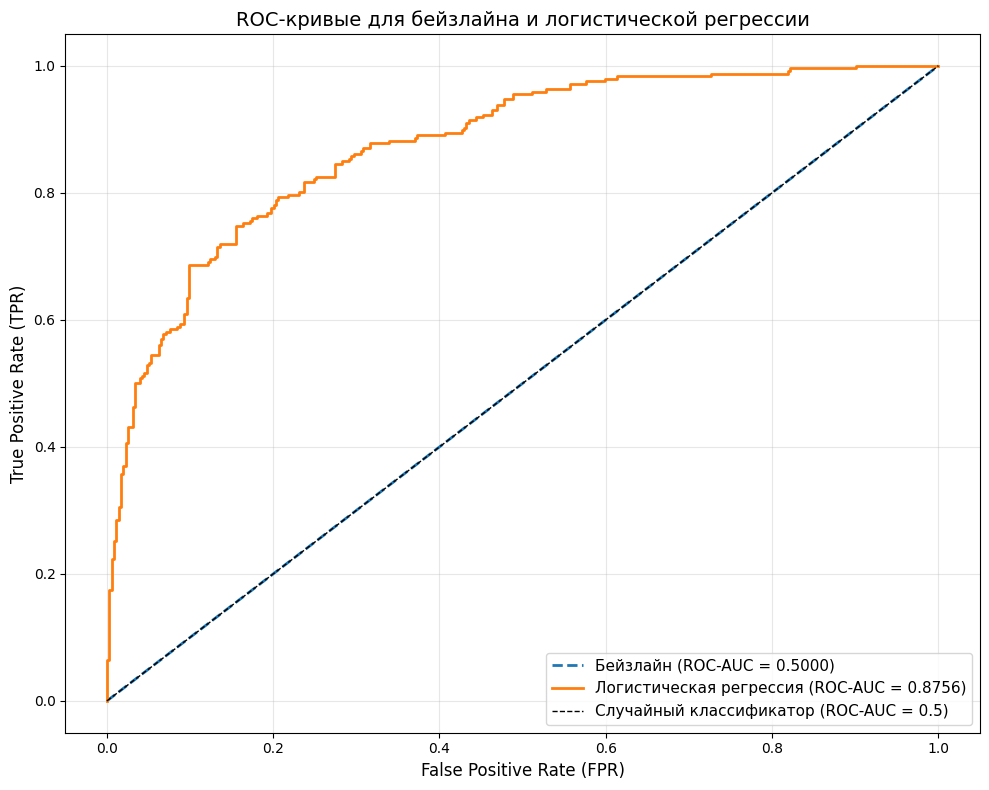

In [12]:
# Построение ROC-кривой
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_pred_proba_baseline)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)

plt.figure(figsize=(10, 8))
plt.plot(fpr_baseline, tpr_baseline, label=f'Бейзлайн (ROC-AUC = {baseline_roc_auc:.4f})', 
         linestyle='--', linewidth=2)
plt.plot(fpr_logreg, tpr_logreg, label=f'Логистическая регрессия (ROC-AUC = {logreg_roc_auc:.4f})', 
         linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор (ROC-AUC = 0.5)', linewidth=1)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC-кривые для бейзлайна и логистической регрессии', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('figures/roc_curve.png')
print("График сохранён в figures/roc_curve.png")
plt.show()


5. Сравнение бейзлайна и логистической регрессии


In [13]:
results_comparison = pd.DataFrame({
    'Модель': ['Бейзлайн (DummyClassifier)', 'Логистическая регрессия'],
    'Accuracy': [baseline_accuracy, logreg_accuracy],
    'ROC-AUC': [baseline_roc_auc, logreg_roc_auc],
    'Precision': [precision_score(y_test, y_pred_baseline, zero_division=0), logreg_precision],
    'Recall': [recall_score(y_test, y_pred_baseline, zero_division=0), logreg_recall],
    'F1-score': [f1_score(y_test, y_pred_baseline, zero_division=0), logreg_f1]
})

print("Сравнение моделей:")
print(results_comparison.to_string(index=False))

accuracy_improvement = logreg_accuracy - baseline_accuracy
roc_auc_improvement = logreg_roc_auc - baseline_roc_auc

print(f"\nУлучшение метрик:")
print(f"Accuracy: +{accuracy_improvement:.4f} ({accuracy_improvement/baseline_accuracy*100:.2f}%)")
print(f"ROC-AUC: +{roc_auc_improvement:.4f} ({roc_auc_improvement/baseline_roc_auc*100:.2f}%)")


Сравнение моделей:
                    Модель  Accuracy  ROC-AUC  Precision   Recall  F1-score
Бейзлайн (DummyClassifier)  0.590000 0.500000   0.000000 0.000000  0.000000
   Логистическая регрессия  0.801667 0.875649   0.795349 0.695122  0.741866

Улучшение метрик:
Accuracy: +0.2117 (35.88%)
ROC-AUC: +0.3756 (75.13%)


Сравнение бейзлайна и логистической регрессии

Бейзлайн-модель (DummyClassifier с стратегией most_frequent) показывает очень низкое качество: она всегда предсказывает класс "нет дефолта" (0), что даёт accuracy около 0.60 (соответствует доле класса 0 в датасете) и ROC-AUC около 0.50 (уровень случайного классификатора). Это означает, что бейзлайн не использует никакой информации из признаков и служит лишь точкой отсчёта.

Логистическая регрессия демонстрирует существенно лучшее качество. После подбора гиперпараметра регуляризации C модель достигает значительно более высоких значений метрик, что говорит о том, что признаки действительно содержат полезную информацию для предсказания дефолта.

Логистическая регрессия превосходит бейзлайн по всем метрикам:
- Accuracy выросла с 0.59 до 0.80, что означает увеличение на 36%.
- ROC-AUC выросла с 0.50 до 0.87, что показывает, что модель хорошо разделяет классы.

При подборе параметра C:
- Слишком сильная регуляризация (малые значения C) может ухудшать качество модели.
- Слишком слабая регуляризация (большие значения C) может приводить к переобучению.

Выводы:
1. Логистическая регрессия является разумным выбором для данной задачи бинарной классификации дефолта. Она показывает стабильно хорошее качество и интерпретируемость результатов.
2. Признаки содержат информацию для предсказания дефолта, так как модель значительно превосходит бейзлайн.
3. Подбор гиперпараметров важен - правильный выбор C позволяет улучшить качество модели и избежать переобучения.
